이디야는 스타벅스 근처에 입점한다는 설이 있습니다. 과연 이디야와 스타벅스의 매장입지는 얼마나 차이가 날까요? 과련 기사를 읽고 구별로 이디야와 스타벅스의 매장을 기사와 유사하게 분석하고 시각화 해보면서 Python, Pandas, Numpy, Seaborn, Matplotlib, folium을 통해 다양한 방법으로 표현해 봅니다.

관련기사
[비즈&빅데이터]스타벅스 '쏠림' vs 이디야 '분산'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

<AxesSubplot:>

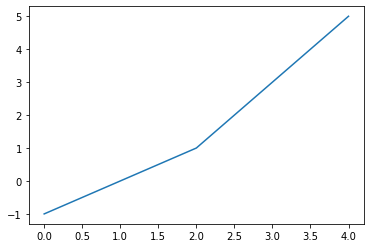

In [2]:
#한글폰트 설정
#폰트가 선명하게 보이도록 retina설정
#한글폰트와 마이너스 폰트 설정 확인

pd.Series([-1,-0,1,3,5]).plot()